In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

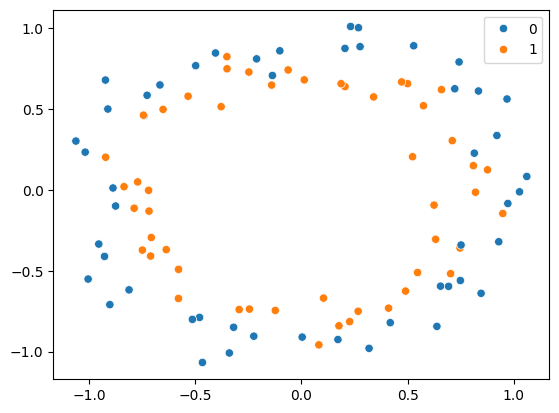

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0)

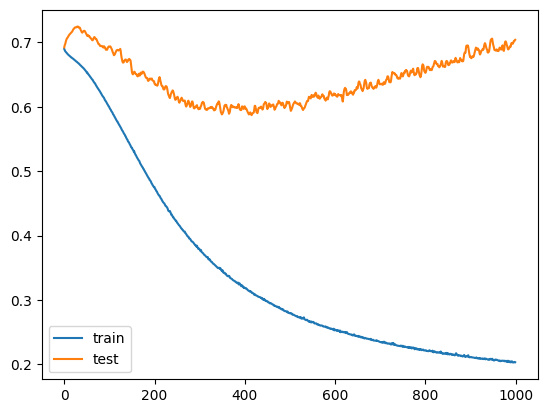

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

We can see that after some time model starts overfitting which results in decreasing loss in training data but increasing loss in validation data. (The distance between training and validation data keep on increasing)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


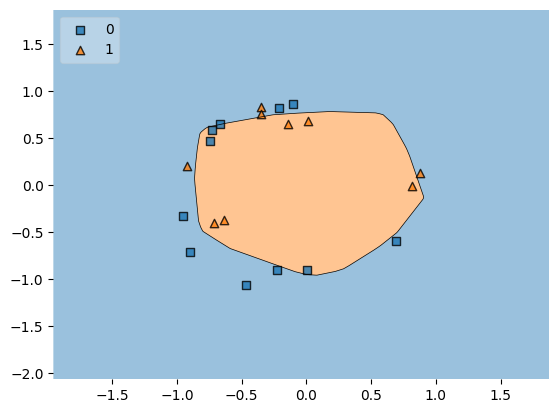

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2) # .ravel() in numpy converts multi-dimensioial array to 1-dimensional array.
plt.show()

# Early Stopping

In [22]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=100, # The reason of using this much patience is that while training validatin accuracy is increasing for some epoch then starts decreasing
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1, callbacks=callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.5617 - loss: 0.6889 - val_accuracy: 0.3500 - val_loss: 0.7132
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6203 - loss: 0.6826 - val_accuracy: 0.2500 - val_loss: 0.7143
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6187 - loss: 0.6828 - val_accuracy: 0.2500 - val_loss: 0.7142
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5367 - loss: 0.6909 - val_accuracy: 0.2500 - val_loss: 0.7131
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5266 - loss: 0.6891 - val_accuracy: 0.2500 - val_loss: 0.7126
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5781 - loss: 0.6874 - val_accuracy: 0.3500 - val_loss: 0.7123
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5711 - loss: 0.6883 - val_accuracy: 0.4000 - val_loss: 0.7120
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5469 - loss: 0.6870 - val_accuracy: 0.3500 - 

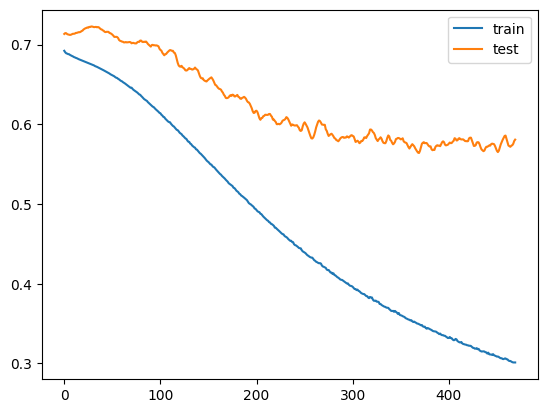

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2) # .ravel() in numpy converts multi-dimensioial array to 1-dimensional array.
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
